# Neural Networks - A Practical Introduction
by _Minho Menezes_  

---

## Neural Networks - Learning

### Libraries

In [1]:
## LIBRARIES ##
import numpy as np                         # Library for Numerical and Matricial Operations
import matplotlib.pyplot as plt            # Library for Generating Visualizations
import pandas as pd                        # Library for Handling Datasets
from tools.tools import Tools as tl        # Library for some Utilitary Tools

### Dataset

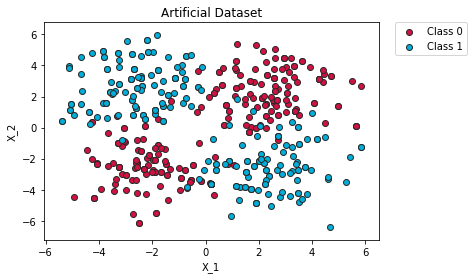

In [2]:
## CARREGANDO E VISUALIZANDO OS DADOS ##
X_train, X_test, y_train, y_test = tl.loadData("data/toy_data_01.csv")
tl.plotData(X_train, y_train)

### Neural Network Class

In [3]:
## CLASS: Multilayer Perceptron ##
class MultilayerPerceptron:
    
    # CLASS CONSTRUCTOR
    def __init__(self, n_neurons=[2, 5, 1]):
        if(len(n_neurons) < 2):
            raise ValueError("The network must have at least two layers! (The input and the output layers)")
        
        # Network Architecture
        self.hidden_layers = len(n_neurons)-2
        self.n_neurons = n_neurons
        self.W = []
        
        # Adjusting the Network architecture
        for i in range(1, len(n_neurons)):
            self.W.append( np.random.randn(self.n_neurons[i-1]+1 , self.n_neurons[i]) )
        
    # ACTIVATION FUNCTION
    def activate(self,Z):
        return 1 / (1 + np.exp(-Z))
    
    # FORWARD PROPAGATION
    def forward(self, X):
        # Activation List
        A = []
        
        # Input Layer Activation
        A.append( np.vstack([np.ones([1, X.shape[1]]), X]) )
        
        # Hidden Layer Activation
        for i in range(0, self.hidden_layers):
            Z = np.matmul(self.W[i].T, A[-1])
            Z = self.activate(Z)
            
            A.append( np.vstack([np.ones([1, Z.shape[1]]), Z]) )
        
        # Output Layer Activation
        Z = np.matmul(self.W[-1].T, A[-1])
        Z = self.activate(Z)

        A.append(Z)
        
        return A
    
    # PREDICT CLASSIFICATION
    def predict(self, X):
        A = self.forward(X)
        
        if(self.n_neurons[-1] > 1):
            return A[-1].argmax(axis=0)
        else:
            return (A[-1] > 0.5).astype(int)
    
    # BACKPROPAGATION
    def backpropagate(self, A, y):
        pass
    
    # GRADIENT DESCENT TRAINING
    def train(self, X_train, y_train, X_test, y_test, alpha=1e-3, maxIt=50000, tol=1e-5, verbose=False):
        pass
        
## ---------------------------- ##

a

In [4]:
def backpropagate(self, A, y):
    # A primeira matriz de erros é calculada diretamente da diferença entre a classe real e a prevista
    E = []
    E.append( A[-1] - y )

    # O erro é, então, propagado para trás até termos os erros da primeira Camada oculta
    for i in range(self.hidden_layers, 0, -1):
        E.append( np.matmul(self.W[i], E[-1]) * A[i] * (1-A[i]) )
        E[-1] = E[-1][1:,:]
        
    # Retornamos o erro calculado em todas as camadas, na ordem inversa do cálculo
    return E[::-1]

MultilayerPerceptron.backpropagate = backpropagate

In [5]:
X = np.array([[ 5,  1, -2],
              [ 4,  2,  0],
              [ 3,  3,  1],
              [ 2,  4, -1]])    

y = np.array([[1, 1, 0]])

# Cálculo da Ativação e dos Erros da Rede Neural
brain = MultilayerPerceptron(n_neurons=[4, 5, 1])

A = brain.forward(X)
E = brain.backpropagate(A,y)

# Visualização dos Resultados
print("# Resultado dos Erros da Rede Neural #")
print("Erro na Camada Oculta:\n", E[0])
print("\nErro na Camada de Saída:\n", E[1])

# Resultado dos Erros da Rede Neural #
Erro na Camada Oculta:
 [[ 2.14486020e-04  1.52251064e-01 -4.09911401e-02]
 [ 2.11920334e-02  5.55507672e-03 -3.61121706e-03]
 [ 7.89374898e-05  1.04062041e-03 -1.85806433e-03]
 [ 1.55607773e-03  4.07513489e-02 -1.17067861e-03]
 [-3.77537307e-02 -1.17922509e-02  1.61314367e-02]]

Erro na Camada de Saída:
 [[-0.53599213 -0.67818578  0.18183388]]


treino

In [6]:
def train(self, X_train, y_train, alpha=1e-3, maxIt=50000, tol=1e-5, verbose=False):
    m = X_train.shape[1]
    
    # Define o Histórico de Erros e algumas variáveis auxiliares
    errorHist = []
    previousMSE = 0
    
    # Realiza o treino por Gradiente Descendente
    for it in range(0, maxIt):
        # 1. Calculamos a ativação de todos os neurônios (Forward Propagation) e 
        #    retropropagamos o erro da predição (Backpropagation)
        A = self.forward(X_train)
        E = self.backpropagate(A, y_train)
        
        # 2. Calculamos o erro MSE, a acurácia do modelo e adicionamos o resultado no histórico.
        actualMSE = (1/m) * -np.sum(y_train * np.log(A[-1]) + (1-y_train) * np.log(1-A[-1]))
        actualAcc = (1 - (1/m) * np.sum(((A[-1] > 0.5).astype(int) - y_train)**2)) * 100
        errorHist.append(actualMSE)
        
        # 3. Realizamos o passo do Gradiente Descendente.        
        for i in range(0, self.hidden_layers+1):
            self.W[i] = self.W[i] - (alpha/m) * np.matmul(A[i], E[i].T)
        
        # 4. Imprimimos o resultado do treinamento a cada 50 épocas.
        if(it % 50 == 0 and verbose): 
            print("## Iteration", it, "##")
            print("Cross-Entropy Loss: \t", actualMSE)
            print("Accuracy (Training Set): {0:.3f}%".format(actualAcc))
            print("Weights\nS -> H:\n", self.W[0], "\nH -> O:\n", self.W[1])
            print("\n")
        
        # 5. Verificamos uma possivel convergência do treinamento, e então encerramos o laço.
        if(abs(actualMSE - previousMSE) <= tol):
            print("!!! Convergence reached !!!")
            print("## Iteration", it, "##")
            print("Cross-Entropy Loss: \t", actualMSE)
            print("Accuracy (Training Set): {0:.3f}%".format(actualAcc))
            print("Weights\nS -> H:\n", self.W[0], "\nH -> O:\n", self.W[1])
            print("\n")
            break;
            
        # 6. Atualizamos as variáveis auxiliares para as próximas iterações.
        previousMSE = actualMSE
    
    # Fim do Treinamento
    return errorHist

MultilayerPerceptron.train = train

In [7]:
brain = MultilayerPerceptron(n_neurons=[2,10,1])
errorHist = brain.train(X_train, y_train, alpha=0.1)

!!! Convergence reached !!!
## Iteration 3152 ##
Cross-Entropy Loss: 	 0.1800885155035458
Accuracy (Training Set): 94.583%
Weights
S -> H:
 [[ 1.49194836 -2.61888019 -1.6419482  -2.40995416  2.18067379 -1.40182703
  -3.39420707 -2.378707   -3.3295839  -2.2095035 ]
 [-0.57525537 -1.24550498  2.03611133 -1.30097569  0.96763388  0.52366961
  -1.11778718  0.65238109  1.26311717 -0.9832606 ]
 [-0.54526372 -0.98075155  1.81932014 -0.9464563  -0.71891118  1.51277759
   1.00333892  0.76257301 -1.18900358 -0.90647387]] 
H -> O:
 [[ 1.05652041]
 [ 2.16901579]
 [-2.65429615]
 [-1.4731238 ]
 [-2.29851922]
 [-2.26715612]
 [-1.00273751]
 [ 4.91568564]
 [-1.88369067]
 [ 4.75563255]
 [-1.90136823]]




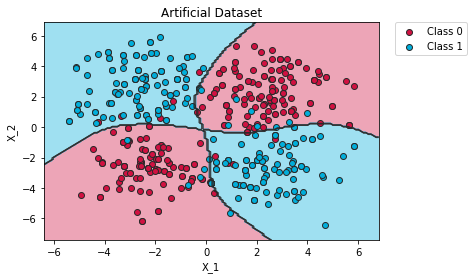

In [8]:
## VISUALIZAÇÃO DA CLASSIFICAÇÃO ##
tl.plotClassContour(X_train, y_train, brain)

multiclass

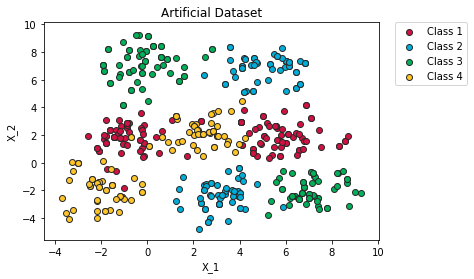

In [9]:
## CARREGANDO E VISUALIZANDO OS DADOS ##
X_train, X_test, y_train, y_test = tl.loadData("data/toy_data_02.csv")
tl.plotData(X_train, y_train)

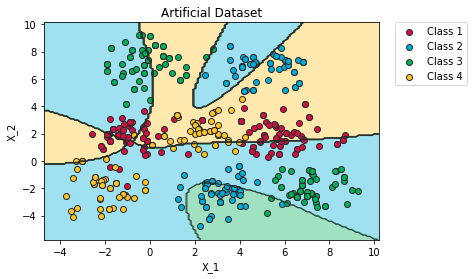

In [10]:
brain = MultilayerPerceptron(n_neurons=[2,50,4])
tl.plotClassContour(X_train, y_train, brain)

In [11]:
brain.train(X_train, y_train, alpha=0.1)

!!! Convergence reached !!!
## Iteration 6599 ##
Cross-Entropy Loss: 	 0.3161915140757658
Accuracy (Training Set): 88.542%
Weights
S -> H:
 [[-1.3683545  -0.95105507  2.65859881  1.71453088 -0.26728981 -0.93099883
   1.8429297  -0.84203853 -2.32828911 -0.79144    -2.15644892  0.4525012
  -2.49389175 -1.10861457 -1.6792007   1.6346231   0.40016147 -0.44599748
   1.17024834  0.75302566  0.74408926  1.77644772 -0.23961348 -1.43085746
  -1.83362332 -2.12394703 -0.4307148   2.02324937 -0.27741601 -0.90670415
  -1.6396689  -0.6781526  -2.69248623 -1.69998353 -0.19725247  0.46050301
  -3.13195159  1.25887166 -0.43322627 -0.64719204 -3.48142554 -4.11259329
  -2.75804929  2.89520379 -0.45430109  1.90619841  0.51513413 -1.88863488
   1.73770652  2.01289015]
 [ 0.28666669  0.09862688 -0.85551407  2.01507091 -2.13405064 -0.91946497
   0.93794368  1.83445094  0.14478414 -1.45264757 -1.28515818 -0.49655383
  -1.08525055 -0.65930231 -1.36981071 -1.15299644 -0.08062719 -0.00470802
  -0.08836084 -0.043

[6.384461522255504,
 5.601376827598722,
 4.962033229996463,
 4.452576096178443,
 4.044830858148609,
 3.7195976723907136,
 3.4608723932211896,
 3.2535128398062874,
 3.0843127951126172,
 2.9428570369919913,
 2.8215682709621914,
 2.715241359051116,
 2.6204185474066164,
 2.5348236181795856,
 2.4569400926985963,
 2.3857309788781853,
 2.3204542383863944,
 2.2605307536007437,
 2.205451474820993,
 2.1547287404389674,
 2.107887863868381,
 2.064480208433448,
 2.0240983809312834,
 1.986384194923665,
 1.9510289296321701,
 1.9177688663509191,
 1.8863789983385546,
 1.8566666867120096,
 1.828466062409196,
 1.8016333963854199,
 1.776043386756996,
 1.751586213200954,
 1.728165195205905,
 1.7056949112456963,
 1.6840996657877374,
 1.6633122194746774,
 1.6432727210692686,
 1.623927797283666,
 1.6052297691712396,
 1.5871359724485519,
 1.5696081649987648,
 1.5526120087524873,
 1.5361166157961954,
 1.520094150377843,
 1.5045194797704042,
 1.489369867914442,
 1.4746247065137845,
 1.4602652788783521,
 1.446274

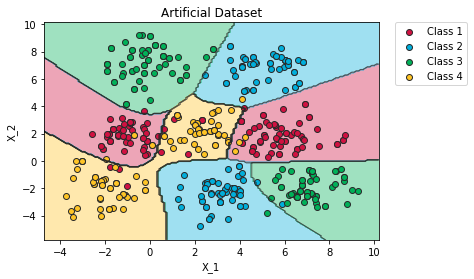

In [12]:
tl.plotClassContour(X_train, y_train, brain)